In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel("DataSets/sales.xlsx",index_col=[0,1])
df

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77
             Central Asia                 37  -2649.76    8190.74
Europe       Western Europe              964  82091.27  656637.14
             Southern Europe             338  18911.49  215703.93
             Northern Europe             367  43237.44  252969.09
             Eastern Europe              241  25050.69  108258.93
LATAM        South America               496  12377.59  210710.49
             Central America             930  74679.54  461670.28
             Caribbean                   288  13529.59  116333.05
USCA         Western US                  490  44303.65  251991.83
             Southern US                 255  19991.83  148771.91
             Eastern US                  443  47462.04  264973.98
             Central US                  356  33697.43  170416.31
             Canada                       49   7246.62   26298.81

In [3]:
#Now Lets say we wants the Total_Number_Of_Order of the specific market. 
#So, leats creat a new dataform which will hold the Total_Number_Of_Order from each market.So,to do show we have a function
#or method for it called Groupby...
#So,that we can group by different rows of the dataframs togethere and perform sum operaions on them...
#We are going to create another datafram which carry total no of the orders and total sales of specific market
df[["No_of_Orders","Sales"]].groupby("Market").sum()

,No_of_Orders,Sales
Market,,
Africa,731,322367.04
Asia Pacific,2481,1537454.71
Europe,1910,1233569.09
LATAM,1714,788713.82
USCA,1593,862452.84


In [4]:
#What does the function: dataframe.groupby() return without any aggregate function?
type(df[["No_of_Orders","Sales"]].groupby("Market"))

pandas.core.groupby.generic.DataFrameGroupBy

In [5]:
#We can also performs some other operations also like max(),min(),mean() etc etc...
# Lets find the max order per market
df[["No_of_Orders"]].groupby("Market").max()

,No_of_Orders
Market,
Africa,251
Asia Pacific,646
Europe,964
LATAM,930
USCA,490


In [6]:
#Find The Avg of sales per market
df[["Profit"]].groupby("Market").mean()

,Profit
Market,
Africa,8825.898000
Asia Pacific,32845.010000
Europe,42322.722500
LATAM,33528.906667
USCA,30540.314000


## Pivoting
### Pivote table is an tool which helps us to represent a dataframe in a structured and simplified manner. It acts as an groupby() function in pandas.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
users = pd.DataFrame({"Days":["Sun","Sun","Mon","Mon"],
                      "City":["Delhi","Allahabad","Delhi","Allahabad"],
                      "Visitors":[140,237,456,328],
                     "Signups":[7,12,18,3]})
users.set_index("Days",inplace=True)
users

,City,Visitors,Signups
Days,,,
Sun,Delhi,140,7
Sun,Allahabad,237,12
Mon,Delhi,456,18
Mon,Allahabad,328,3


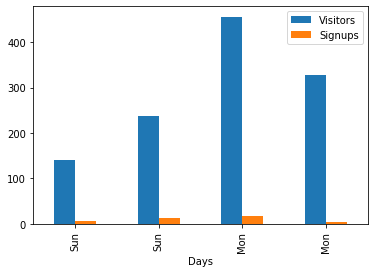

In [9]:
#Lets plot graph on this DataFrame
users.plot(kind="bar")
plt.show()

In [10]:
#Here as we can see that Sunday and Monday both are repeting because the data is in tabular form, it is not well structured.
#So, Now we will use the method Pivot of pandas to well structured our data...
#Pivote Will work on columns level datawhere we are trying to identifying the unique elements from a column and then
#trying to creat another columns for each value or each unique taken from the column
# Lets Say we wants to extract the data of visitors from (Sun and Mon) & (Delhi & Allahabad)
pivot_=users.pivot(columns="City",values="Visitors")
#So, we are telling to pandas that using the Users datafram identify the unique elements city create a seperate columns
#for the each of the unique values and then assign values from the visitors col.
pivot_

City,Allahabad,Delhi
Days,,
Mon,328,456
Sun,237,140


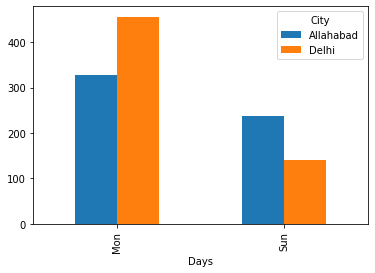

In [11]:
#Lets Now plot it
pivot_.plot(kind="bar")
plt.show()

In [12]:
#Lets do it for the both datas Visitors and Singhups and then subplot the graph...
pivote_1=users.pivot(columns="City")
#Here pivot function will take care of the values
pivote_1

Visitors         Signups      
City Allahabad Delhi Allahabad Delhi
Days                                
Mon        328   456         3    18
Sun        237   140        12     7

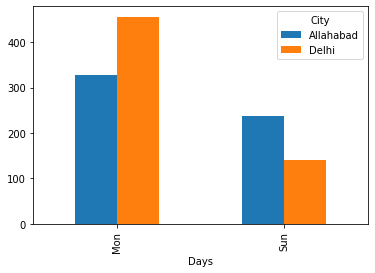

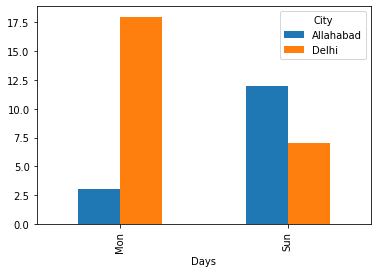

In [34]:
pivote_1["Visitors"].plot(kind="bar")
pivote_1["Signups"].plot(kind="bar")
plt.show()

In [18]:
#Lets see how we can group by the help of the pivote function
pivote_tab=users.pivot_table(index=["City","Days"],values=["Visitors","Signups"])
pivote_tab

Signups  Visitors
City      Days                   
Allahabad Mon         3       328
          Sun        12       237
Delhi     Mon        18       456
          Sun         7       140

In [19]:
#Now  we can also use this pivote table for various operation just like groupby ->min(),max(),mean()...etc
pivote_tab.mean()

Signups      10.00
Visitors    290.25
dtype: float64

In [20]:
pivote_tab.max()

Signups      18
Visitors    456
dtype: int64